### The goal for this tutorial

The goal will be to plot a variety of 1 dimensional electron density models of the solar atmosphere, both theoretical and empirical. The empirical models that we will use (Newkirk and Saito) are often used for estimates of radio burst altitude and speed in the corona. We'll be plotting electrons density as a function of height $n(r)$.

N.B. When I use the term height, altitude or distance I mean heliocnetric distance i.e., 1 R$_{\odot}$ is the solar surface.

### First let's start with the hydrostatic plane parallel model

Start with plotting the following equation from 1-10 solar radii
\begin{equation}
n(r) = n_0\mathrm{exp}\bigg(\frac{-r}{H}\bigg)
\end{equation}

where $n_0$ is the density at the base of the corona and $r$ is the distance into the solar atmosphere. $H$ is known as the scale height. And is given by

\begin{equation}
H = \frac{m_p g_{\odot}}{k_B T}
\end{equation}

where $k_B$ is Boltzmann's constant, $T$ is the temperature, $m_p$ is the proton mass, and $g_{\odot}$ is solar gravity. What is the significance of the scale height?

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Let's first define some constants

In [7]:
n0 = 1e9       # Electron density at 1 Rsun (cm^-3)
T = 3e6        # MK
kb = 1.38e-23  # Boltzman constant J/K
mp = 1.67e-27  # Proton mass kg
Msun = 2e30    # Solar mass kg
rsun = 6.96e8  # Solar radius m
G = 6.67e-11   # Universal gravitational constant (m3 kg-1 s-2)
gsun = 274     # Solar gravity (m/s/s)

### First build a 1D distance grid

In [8]:
radius = np.arange(1,10,0.1) # Solar radii
print(radius)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3
 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1
 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


### Let's look at a plane-parallel hydrostatic model

In [9]:
H = kb*T/(mp*gsun)
print('Hydrostatic scale height: %s Mm' %(H/1e6))


Hydrostatic scale height: 90.47598234188558 Mm


In [10]:
Hrsun = H/rsun
npp = n0*np.exp((-1.0/Hrsun)*(radius-1))
print(Hrsun)

0.12999422750270917


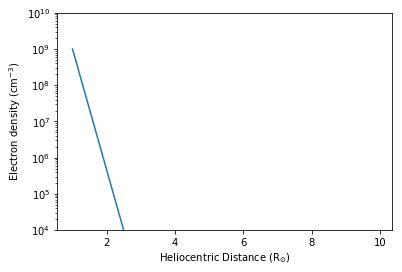

In [11]:
fig, ax = plt.subplots()
ax.plot(radius, npp)
ax.set_yscale('log')
ax.set_ylim(1e4,1e10)
ax.set_xlabel('Heliocentric Distance (R$_{\odot}$)')
ax.set_ylabel('Electron density (cm$^{-3})$')
plt.show()

### Increasing the temperature of the atmosphere

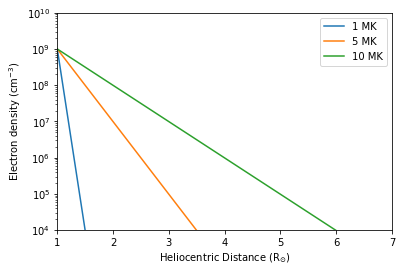

In [12]:
fig, ax = plt.subplots()
def plothydrostat(radius, temp, label=None):
    H = kb*temp/(mp*gsun)
    Hrsun = H/rsun
    n = n0*np.exp((-1.0/Hrsun)*(radius-1))
    ax.plot(radius, n, label=label)
    
    return ax
plothydrostat(radius, 1e6, label='1 MK')
plothydrostat(radius, 5e6, label='5 MK')
ax = plothydrostat(radius, 10e6, label='10 MK')
ax.set_yscale('log')
ax.set_ylim(1e4,1e10)
ax.set_xlabel('Heliocentric Distance (R$_{\odot}$)')
ax.set_ylabel('Electron density (cm$^{-3})$')
ax.set_xlim(1,7)
plt.legend()
plt.show()

### Now let's plot the spherically symmetric solution


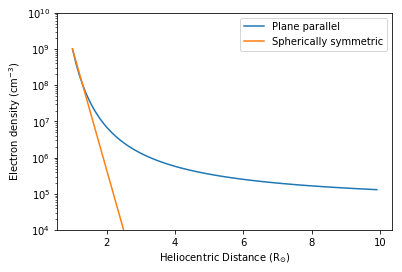

In [13]:
# The difference here is the scale-height isn't just a single value
T = 1.4e6
H = (2*kb*T*rsun)/(G*Msun*mp*1.2)
nss = n0 * np.exp ( (1/H)*(1/(radius) - 1) )
plt.plot(radius, nss, label='Plane parallel')
plt.plot(radius, npp, label='Spherically symmetric')
plt.yscale('log')
plt.ylim(1e4,1e10)
plt.xlabel('Heliocentric Distance (R$_{\odot}$)')
plt.ylabel('Electron density (cm$^{-3})$')
plt.legend()
plt.show()

### What does this look like in terms of plasma frequency?

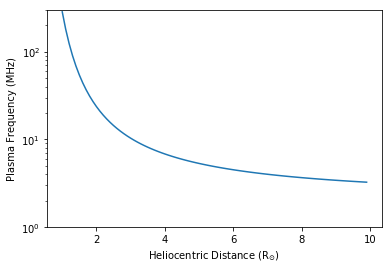

In [14]:
fplasma_pp = 8980.0*np.sqrt(npp)/1e6
fplasma_ss = 8980.0*np.sqrt(nss)/1e6
plt.plot(radius, fplasma_ss)
plt.xlabel('Heliocentric Distance (R$_{\odot}$)')
plt.ylabel('Plasma Frequency (MHz)')
plt.yscale('log')
plt.ylim(1,300)
plt.show()


### Now let's plot some empirical density models

In [15]:
# The Newkirk model
N=4.2e4
newkirk=N*10.0**(4.32/radius) 

# The Saito QS model
c1, c2, d1, d2 = 1.36e6, 1.68e8, 2.14, 6.13
saito=c1*radius**(-1.0*d1) + c2*radius**(-1.0*d2)  

plt.plot(radius, newkirk, label='Newkirk')
plt.plot(radius, saito, label='Saito')
plt.plot(radius, nss, label='Hydrostat SS')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Electron density (cm$^{-3}$)')
plt.xlabel('Heliocentric Distance (R$_{\odot}$)')
plt.legend()



### Now let's get the speed of the shock that caused the type II

In [16]:
# Firstly we convert frequency to density
def freq2dens(freq):
    # freq in Hz
    emass = 9.11e-28       # grams (cgs)
    eq = 4.80e-10          # statcouloumb (cgs)
    ne = (np.pi*emass*freq**2)/eq**2
    return ne # cm^-3

In [17]:
from astropy.time import Time
from datetime import datetime
from scipy import stats

# Read in the frequency time points from Pearse's tutorial.
result = np.load('/Users/eoincarley/Desktop/WP4-T1/STELLAR_SSW_tutorials/day2_radio_session/ft_coords.npz', allow_pickle=True)
time = result['arr_0']
time = Time(time).unix
tsec = time - time[0]
freq = result['arr_1']

# Read in the frequency time points from Pearse's tutorial.
#freq = np.array([150e6, 100e6, 40e6, 30e6, 20e6])
#tsec = np.array([0, 120, 200, 360, 520])

# Convert the frequencies to densities.
# density = freq2dens(freq)

density = freq2dens(freq*1e6)
print(density)

[25901780.03874429 19883225.99254251 16583424.06190234 15212887.15286152
 13688626.54649108 12751224.72265591 10976156.71435402  9956857.27092373
  9073317.05990052  7351479.1213379 ]


In [18]:
# Now use one of the density models to map density to radius
rpoints = np.interp(density, newkirk[::-1], radius[::-1])

In [19]:
print(rpoints)

[1.55511805 1.61809467 1.66927492 1.69053208 1.72254949 1.74568078
 1.78948228 1.82227452 1.85545876 1.92950182]


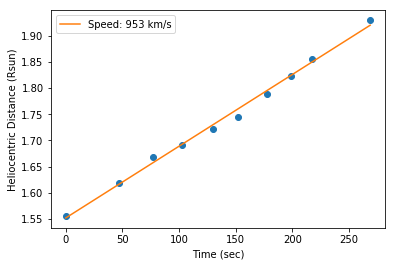

In [21]:
from scipy import stats

# Plot the results and fit a line to the data points
speed, rstart, r_value, p_value, std_err = stats.linregress(tsec, rpoints)
speedkm = speed*rsun
speedstring = 'Speed: '+str(round(speedkm/1e3))+' km/s'

fig, ax = plt.subplots()
plt.plot(tsec, rpoints, 'o')
plt.ylabel('Heliocentric Distance (Rsun)')
plt.xlabel('Time (sec)')
plt.plot(tsec, rstart + speed*tsec, label=speedstring)
plt.legend()
plt.show()

In [23]:
print(speedkm/1e3)

952.6538827684496


### Now estimate the speed using the Saito model.